<a href="https://colab.research.google.com/github/TheHakoDrako/IA_Machine_Learning/blob/main/Modelos_Analisis_Datos_KO_PEPJeronimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creador: Jeronimo Ramírez Mejía
Modelos Analisis de datos "KO" (Cocacola) y "PEP" (Pepsi)

In [ ]:
### SE CARGAN LAS LIBRERIAS

install.packages("quantmod")
library(quantmod)

install.packages("dynamac")
library(dynamac)

install.packages("nardl")
library(nardl)

Se instalan las librerias necesarias para correr el modelo.

In [ ]:
# IMPORTAR LAS LIBRERIAS PARA LECTURA DE DATOS DE LA WEB
# DEFINE TICKERS

tickers = c("KO", "PEP")
getSymbols(tickers, from = '2019-01-01', to = "2021-12-06", warnings = FALSE, auto.assign = TRUE)

Luego de instalar las librerias, se importan los tickers de las empresas Cocacola "KO" y Pepsi "PEP", las cuales han tenido una competencia marcado y que pueden mostrarnos pocas diferencias, pero la varible PEP servira como la acompañante de KO. Por otro lado, se asignan las fechas de los precios de cada una de las empresas, el cual es desde el 2019/01/01 hasta el lunes 6 de diciembre del 2021 (mes actual).

In [ ]:
# SE COMPRUEBAN LOS ARCHIVOS

head(KO)
head(PEP)

Luego de cargar y generar los datos en el modelo, se busca separar y obtener los precios de cierre de las dos empresas.

In [ ]:
# SE SEPERAN LAS SERIES DE INTERES

D = data.frame(PEP$PEP.Close, KO$KO.Close)
head(D)

Luego se obtienen los dataframe de las empresas y los datos de precios de cierre están conformados por la variable "D".

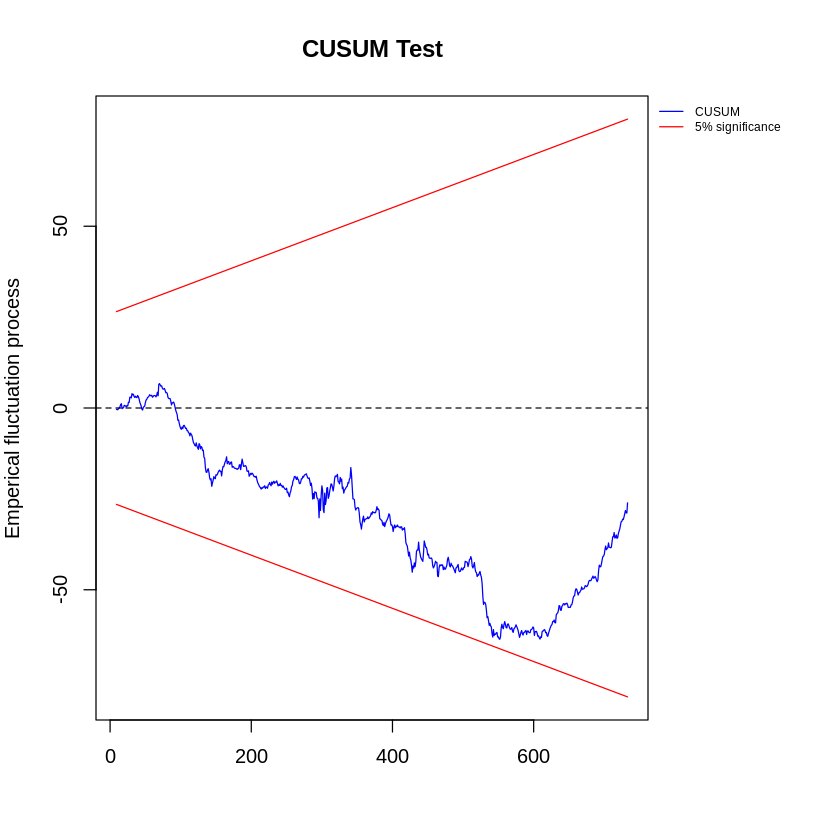


 NARDL model:

Call:
lm(formula = dy ~ lay + lxp + lxn, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1019 -0.5708 -0.0092  0.6221  7.2802 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Const         3.97072    1.24383   3.192  0.00147 ** 
PEP.Close_1  -0.21314    0.03710  -5.745 1.35e-08 ***
PEP.Close_2   0.24476    0.03715   6.589 8.53e-11 ***
PEP.Close_3  -0.06442    0.02496  -2.581  0.01004 *  
KO.Close_p    1.46509    0.11600  12.630  < 2e-16 ***
KO.Close_p_1 -1.08653    0.17649  -6.156 1.23e-09 ***
KO.Close_p_2 -0.32903    0.12781  -2.574  0.01024 *  
KO.Close_n    2.19812    0.09865  22.283  < 2e-16 ***
KO.Close_n_1 -2.50045    0.17973 -13.912  < 2e-16 ***
KO.Close_n_2  0.34750    0.12740   2.728  0.00653 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.235 on 725 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.6119,	Adjusted R-squar

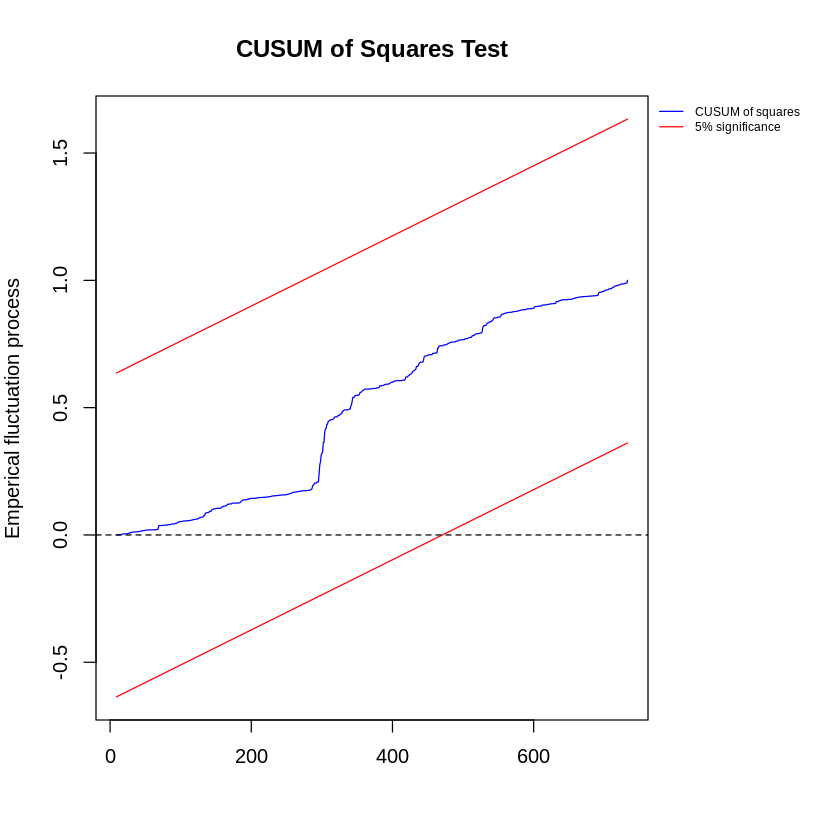

In [ ]:
# SE OPERA EL MODELO DE COINTEGRACIÓN OCULTA Y COEFICIENTES ASIMÉTRICAS

HIS.AG = nardl(PEP.Close ~ KO.Close, data = D, ic = "aic", maxlag = 4, graph = TRUE, case = 3)
summary(HIS.AG)

Luego, aplicamos la libreria nardl, del cual, nos servirá como herramienta para obtener diferentes datos, el cual, defino PEP.Close en función de KO.Close, dado que ya se configuró la variable "D" de dataframe, también gracias a la gráfica y summary del modelo de coeficientes asimétricos obtenemos que:

- La gráfica 1 nos demuestra un proceso de fluctuación (De tipo empírica), pues observamos la inovación explicada por las fluctuaciones empíricas (Determinada por las franjas críticas de un 5%, mostrándonos que los coeficientes son estables ya que no se salen de las franjas rojas.
- Estos modelos ARDL requieren que sean i1 la variable de análisis (Mostrado en la lm formula del summary) y medimos el nivel de integración de la serie, mostrando que la constante es significativa, al igual que la información que aportan los cierres del precio de la empresa KO, siendo igualmente significativas (En conjunto, la mayoria de las variables son significativas).
- El R cuadrado es de 0,61 dado que es un modelo no lineal.
- El P valor no tiene distribución normal, y la hipotesis nula demuestra que no hay correlación.
- La hipótesis de corto y largo plazo muestran que los coeficientes Bi son simétricos, plantean igualdad, por tanto, podemos destacar lo siguiente.

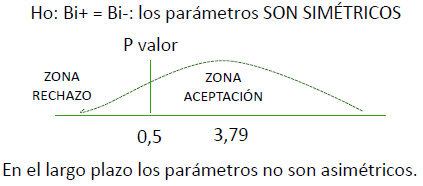

In [ ]:
# SE OPERA EL MODELO ARDL EN CORRELACIÓN DE ERRORES PARA COINTEGRACIÓN OCULATA E IMPULSO RESPUESTA

PEPC = PEP$PEP.Close
KOC = KO$KO.Close

IR.AG = dynardl(PEPC ~ KOC,
  lags = list("PEPC" = 1, "KOC" = 1),
  diffs = c("PEPC", "KOC"),
  lagdiffs = list("PEPC" = 1, "KOC" = 1),
  ec = FALSE,
  simulate = TRUE, shockvar = "KOC", fullsims = TRUE)

summary(IR.AG)

[1] "Dependent variable to be run in levels."
[1] "KOC shocked by one standard deviation of KOC by default."


Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


[1] "dynardl estimating ..."
  |======================================================================| 100%


Warning message in summary.lm(object$model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = as.formula(paste(paste(dvnamelist), "~", paste(colnames(IVs), 
    collapse = "+"), collapse = " ")))

Residuals:
       Min         1Q     Median         3Q        Max 
-3.412e-13 -3.900e-16  2.500e-16  8.300e-16  1.535e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  5.029e-14  6.982e-15  7.202e+00 1.48e-12 ***
l.1.PEPC     1.000e+00  6.167e-17  1.622e+16  < 2e-16 ***
ld.1.PEPC    1.327e-16  4.019e-16  3.300e-01   0.7413    
d.1.KOC     -2.142e-15  1.028e-15 -2.083e+00   0.0376 *  
l.1.KOC     -5.510e-17  1.883e-16 -2.930e-01   0.7699    
ld.1.KOC     3.813e-16  1.018e-15  3.750e-01   0.7081    
d.1.PEPC     1.000e+00  4.078e-16  2.452e+15  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.393e-14 on 729 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.021e+31 on 6 and 729 DF,  p-v

Construyendo la ecuación genérica, del cual, los párametros son de gran relevancia, pues, en este caso, estamos desarrollando el modelo impulso respuesta, que en sí, a nivel, los lag van para PEP (1) y KO (1), podemos obtener del summary lo siguiente:

- Las variables significativas son el intercepto, y la variable PEP (la diferencia de la variable).
- El R cuadrado da 1 (El modelo es perfecto, por tanto, hay que tener cuidado con el modelo.
- El impulso respuesta a pesar de que no es bueno el modelo, es importante buscar diferentes parámetros y en el juego con ellos, obtener un mejor modelo de corrección de errores para obtener mejores diferencias.

Warning message in dynardl.simulation.plot(x, response = "cumulative.abs.diffs", :
“Cumulative absolute effects assumed to be noise (by tolerance) at t = 1.”
Warning message in dynardl.simulation.plot(x, response = "cumulative.abs.diffs", :
“Y does not move beyond the tolerance in the simulation. Reconsider the tolerance, or investigate if Y responds to the shockvar in the dynardl model.”


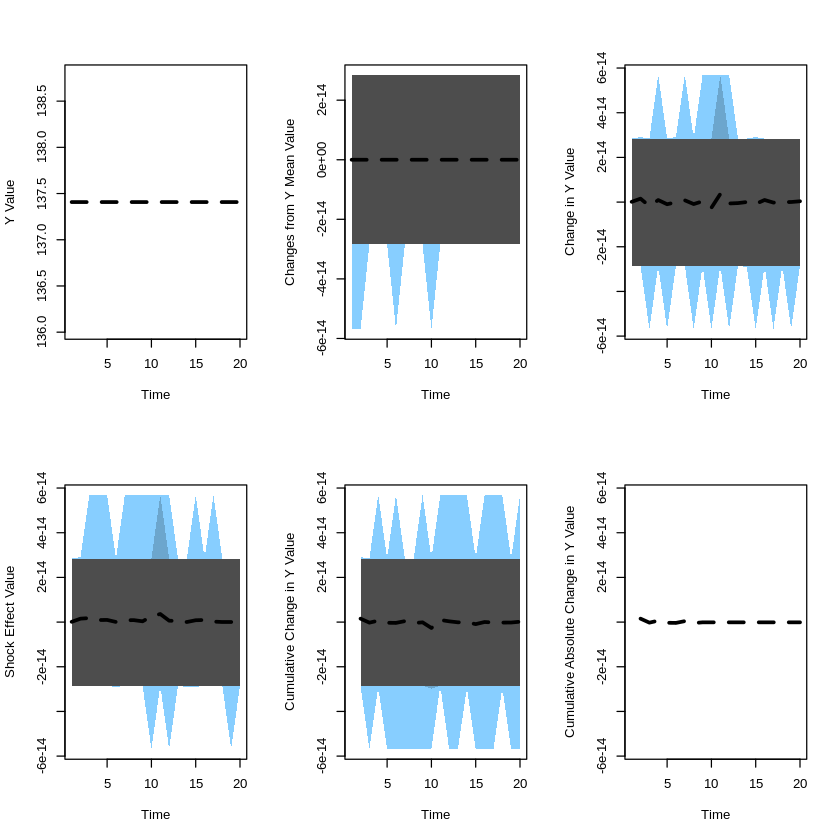

In [ ]:
# GRAFICA DE IMPULSO RESPUESTA

dynardl.all.plots(IR.AG)

Se construye la gráfica del modelo (Plot), y nos saca 6 funciones impulso respuesta, podemos osbervar varias categorias este tipo de funciones, podemos observar que existen diferentes impulsos ante una desviación estándar y es allí donde se puede mercar esos análisis de los movimiento de PEP (Pepsi) contra los de KO (Cocacola) y lo interesante que nos muestra las gráficas, son aquella competencia que es muy similar, realmente no muestra muchos cambios y la fluctuación es derivada por temporados, mientras que los valores de la serie cambian de acuerdo a los movimientos de cada empresas, pero normalmente no hay muchas diferencias de esos cambios, los valores medios permanecen en el tiempo y es esa tendencia en el tiempo que hace que las empresas se mantengan a lo largo del tiempo en el mercado.

In [ ]:
dim(KOC)

In [ ]:
# SE CARGA LA LIBERA PARA EL MODELO DE QUIEBRE ESTRUCTURAL

library(strucchange)

CEPK = breakpoints(PEPC ~ KOC, h = 0.12)

Cargamos la libreria importante para arrancar el modelo de quiebre estructural, observando el breakpoints de acuerdo a un "dim(KOC)" el cual es el numero de datos "732" y esos datos son analizandos cada 12 días, pues se dividen por 90 dias, por tanto, cada 12 días (0,12), se analizan los choques de quiebre estructural en las variables del modelo.

In [ ]:
# SE REALIZA EL SUMMARY DE CEPK

summary(CEPK)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = PEPC ~ KOC, h = 0.12)

Breakpoints at observation number:
                                  
m = 1          303                
m = 2              311         636
m = 3   88         316         636
m = 4   88         316     532 639
m = 5   88         317 438 532 639
m = 6   88 176     317 438 532 639
m = 7   88 176 264 353 441 532 639

Corresponding to breakdates:
                                                                               
m = 1                                       0.410569105691057                  
m = 2                                                         0.421409214092141
m = 3   0.119241192411924                                     0.428184281842818
m = 4   0.119241192411924                                     0.428184281842818
m = 5   0.119241192411924                                     0.429539295392954
m = 6   0.119241192411924 0.238482384823848                   0.42953929539295

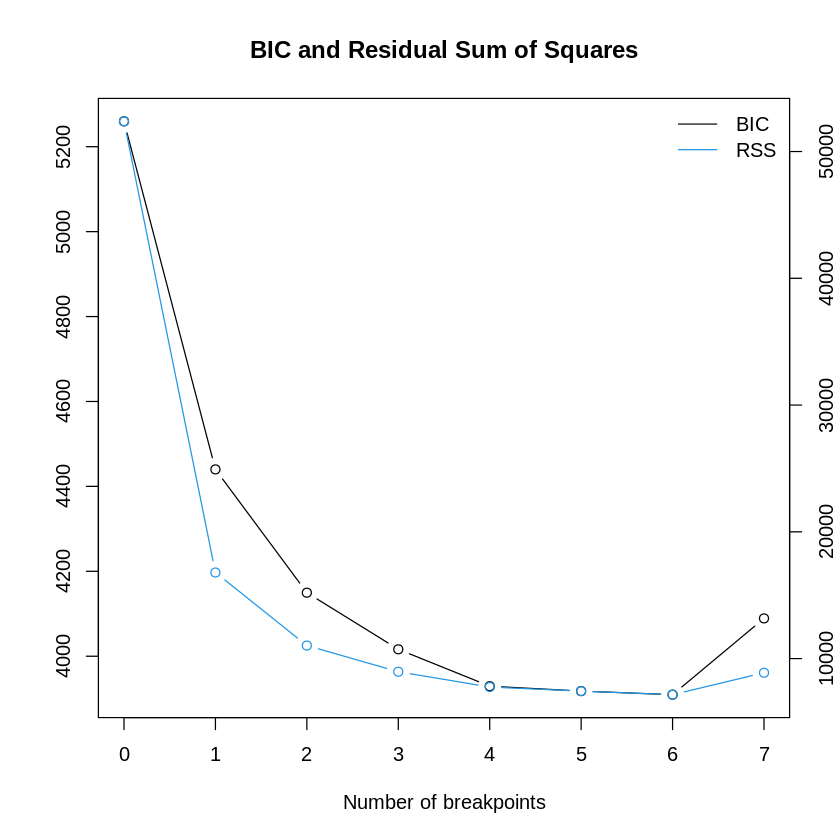

In [ ]:
# SE REALIZA LA GRAFICA DE CEPK POR MEDIO DEL PLOT

plot(CEPK)

Luego de obtener el summary, el cual nos muestra los datos del modelo, para luego, generar la gráfica del plot, donde podemos observar el cambio estructural.
- Se observa que las curvas se cruzan en "0" y en 4, 5 y 6, lo que nos muestra que dentro de la estructura del cambio estructural lo óptimo son entre 4 y 6 cambios estructurales.

In [ ]:
# CREACION DE INDICE PARA LA GRAFICA

PEPC.DF = data.frame(PEPC)

INDICE = c(1:738)
A = data.frame( INDICE, PEPC.DF)

Se hace un ajuste del indice, con el número de datos, para obtener un mejor data.frame para la gráfica de la posición de los quiebres estructurales y poder obtener mejores resultados del modelo respecto a los breackpoints.

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


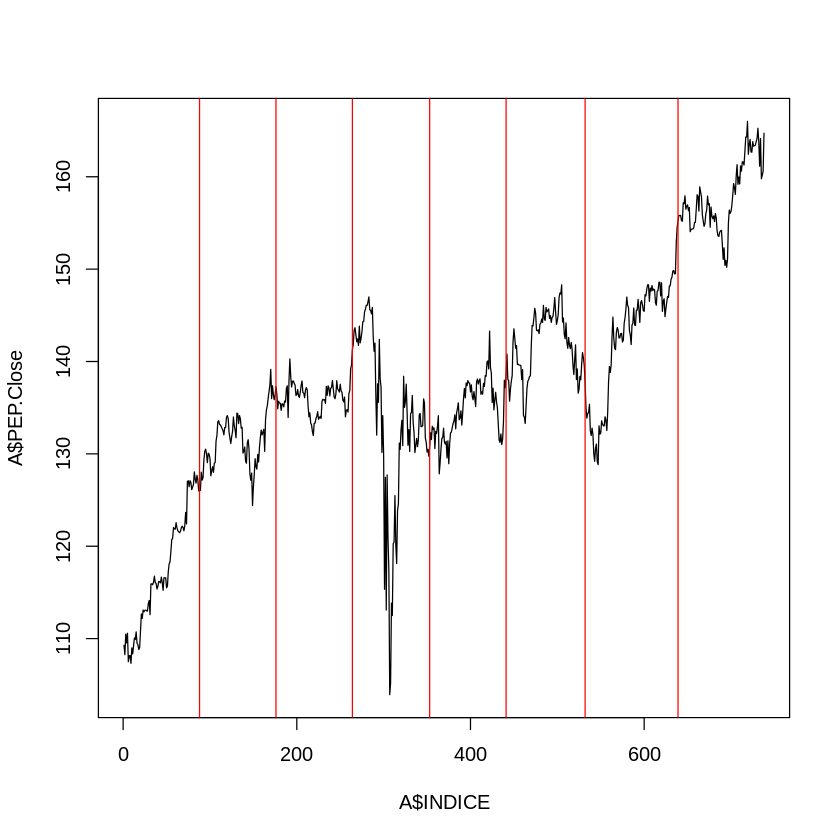

In [ ]:
# SE PLOTEA LA VARIABLE DE ANÁLISIS Y SE TRAZA EL BREAKPOINT
# DATOS PARA GRAFICAR LOS QUIEBRES ESTRUCTURALES = 88 176 264 353 441 532 639

plot(A$INDICE, A$PEP.Close, type = "line")
abline(v=88, col="red")
abline(v=176, col="red")
abline(v=264, col="red")
abline(v=353, col="red")
abline(v=441, col="red")
abline(v=532, col="red")
abline(v=639, col="red")


Por último, luego de crecer los varios quiebres estructurales (Lineas de color Rojo), podemos determinar que la gráfica muestra cierta volatidiad, y tenemos diferentes puntos importantes.

- En priemr lugar, el plot del índice contra el precio de PEP de cierre, es mostrado en una linea, y podemos observar una tendencia aprox en "300" el cual, tiene una baja, una caida dentro del comportamiento del cambio, bajando, pero luego tener una relación poco temporal, mostrando un crecimiento en "350".
- Podemos observar que, los cambios en la estructurada también son determinados por las fechas y los precios de cierre, podemos observar que la relación esta aumentando, luego baja, luego es constante (Aunque existen variaciones), luego vuelve a subir y mantenerse constante, pues esa bajada se relaciona con el COVID, dato interesante, ya que, podemos determinar que la pandemia realmente afectó los precios (De manera negativa), pero luego de esto, los precios comienzan a recuperarse cuando en el tiempo comienza a existir mayor dinamismo en el mercado económico.
- El precio de la acción sube cuando hay mayor participación y apalancamiento de la empresa, pues, a pesar que los precios de las empresas bajaron notoriamente generando un quiebre instructural, al igual que la votalidad del mercado y los bienes básicos a pesar de que bajaron, el hecho de que al ser un sector de bebidas (Alimentos), vuelve a crecer cuando los demandantes aumentan, y su deseo por el bien crece, pues, parte de la población siguió comprando por medio del mecanismo de domicilios.